# Import the necessary libraries

In [39]:
import pandas as pd

## Import the dataset

In [40]:
data = pd.read_csv('Churn_Modelling.csv')

In [41]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
training_data = data.iloc[:, 3:13]

In [43]:
output_data = data['Exited']

## Convert the categorical data

In [44]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

In [45]:
geographyEncoder = LabelEncoder()

In [46]:
training_data['Geography'] = geographyEncoder.fit_transform(training_data['Geography'])

In [47]:
geographyEncoder.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [48]:
training_data['Geography'].head()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int32

In [49]:
gender_encoder = LabelEncoder()

In [50]:
training_data['Gender'] = gender_encoder.fit_transform(training_data['Gender'])

In [51]:
gender_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set()

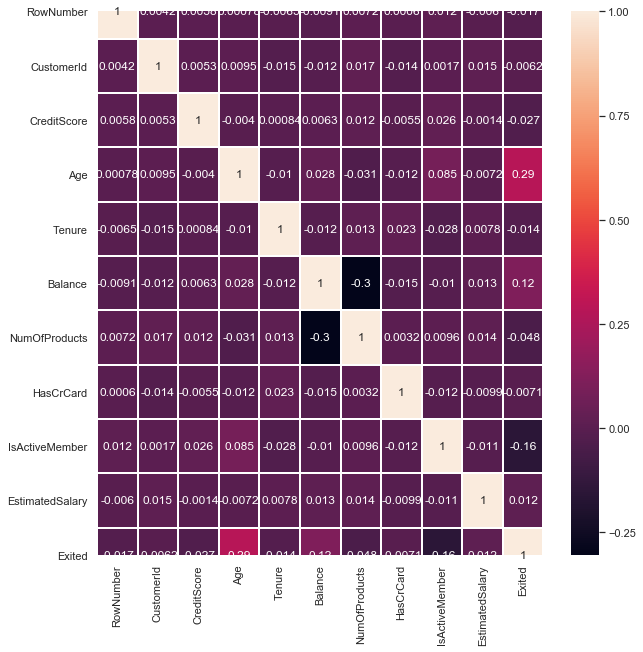

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidth=1,
           linecolor='w')

## Split the data into Train & Test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X, x_test, Y, y_test = train_test_split(training_data, 
                                        output_data, 
                                        test_size = 0.2, 
                                        random_state = 42)

In [57]:
from keras.models import Sequential
from keras.layers import Dense

## Creating our Neural Network

In [58]:
classifier = Sequential()

In [59]:
len(training_data.columns)

10

In [60]:
## First - Input Layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [61]:
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

In [62]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [63]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
# Fitting the ANN to the Training set
classifier.fit(X, Y, batch_size = 2, epochs = 20)

Epoch 1/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.5446 - acc: 0.7921
Epoch 2/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.5114 - acc: 0.7945
Epoch 3/20
8000/8000 [==============================] - 10s 1ms/step - loss: 0.5088 - acc: 0.7945
Epoch 4/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5087 - acc: 0.7945
Epoch 5/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5240 - acc: 0.7945
Epoch 6/20
8000/8000 [==============================] - 8s 1ms/step - loss: 0.5121 - acc: 0.7945
Epoch 7/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5048 - acc: 0.7945
Epoch 8/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5021 - acc: 0.7945
Epoch 9/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5009 - acc: 0.7945
Epoch 10/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5007 - acc: 0.7945
Epoch 11/20
8000/8000 [===

## Making Predictions

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [67]:
y_pred = (y_pred > 0.5)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [70]:
confusion_matrix(y_test, y_pred)

array([[1607,    0],
       [ 393,    0]], dtype=int64)

In [71]:
accuracy_score(y_test, y_pred)

0.8035